In [29]:
import pandas as pd
import gdal
from PIL import Image
import numpy as np
from affine import Affine
import rasterio
from shapely.geometry import Point
import geopandas as gpd

In [30]:
vege = rasterio.open("./data/vege_height.tif")

In [31]:
vege.shape

(19, 32)

In [32]:
print(vege.bounds)
print(vege.crs)
print(vege.height)
print(vege.width)

BoundingBox(left=268905.99, bottom=3297304.2600000002, right=269225.99, top=3297494.2600000002)
EPSG:4326
19
32


In [33]:
geo = []
lat= []
long = []
for r in range(vege.height):
    for c in range(vege.width):
        x, y = rasterio.transform.xy(vege.transform, r, c)
        p = Point(rasterio.transform.xy(vege.transform, r, c)) 
        lat.append(y)
        long.append(x)
        geo.append(p)

In [34]:
vege_img = Image.open("data/vege_height.tif")
vege_np = np.array(vege_img) 
print(vege_np.shape)
vege_np

(19, 32)


array([[ 3.9712486e+00,  1.7924519e+00, -1.6861591e+00, -3.5620556e+00,
         4.2731514e+00, -4.2849998e+00, -8.6895237e+00,  5.8640900e+00,
        -1.0916138e+00,  1.5285873e-01, -4.6666527e-01, -3.7380981e-01,
         0.0000000e+00, -6.2500000e-02, -6.8045616e-01,  2.5787487e+00,
         1.7458973e+00,  1.0650005e+00, -1.1336842e+00,  7.0232773e-01,
         7.5214825e+00,  2.4287834e+00, -4.0279961e-01,  2.2621746e+00,
         4.8155727e+00,  7.2665558e+00,  9.6236372e+00, -3.7340164e-02,
        -4.1603298e+00,  8.4427586e+00,  1.0481529e+00,  1.8576469e+00],
       [-3.4193439e+00,  9.7327614e-01, -4.4307308e+00, -4.3754845e+00,
        -3.5503368e+00, -6.6409721e+00, -4.3294659e+00,  2.9483166e+00,
        -9.6219540e-01,  2.8508186e-01, -1.1422272e+00, -2.1286030e+00,
         1.8542862e+00, -9.3243980e-01, -1.1540222e-01, -1.7346077e+00,
         2.3461018e+00,  1.8263245e-01, -3.3770237e+00, -2.2666359e+00,
         1.2545052e+00, -4.4390564e+00, -4.2993317e+00, -4.2321

In [35]:
vege_np.tolist()

[[3.9712486267089844,
  1.7924518585205078,
  -1.6861591339111328,
  -3.5620555877685547,
  4.273151397705078,
  -4.284999847412109,
  -8.689523696899414,
  5.8640899658203125,
  -1.09161376953125,
  0.15285873413085938,
  -0.46666526794433594,
  -0.373809814453125,
  0.0,
  -0.0625,
  -0.6804561614990234,
  2.5787487030029297,
  1.7458972930908203,
  1.0650005340576172,
  -1.1336841583251953,
  0.7023277282714844,
  7.521482467651367,
  2.428783416748047,
  -0.4027996063232422,
  2.262174606323242,
  4.815572738647461,
  7.2665557861328125,
  9.623637199401855,
  -0.03734016418457031,
  -4.160329818725586,
  8.442758560180664,
  1.0481529235839844,
  1.8576469421386719],
 [-3.419343948364258,
  0.9732761383056641,
  -4.430730819702148,
  -4.375484466552734,
  -3.5503368377685547,
  -6.640972137451172,
  -4.329465866088867,
  2.9483165740966797,
  -0.9621953964233398,
  0.2850818634033203,
  -1.1422271728515625,
  -2.128602981567383,
  1.8542861938476562,
  -0.9324398040771484,
  -0.11

In [36]:
height = np.squeeze(vege_np.reshape((1,-1))).tolist()

In [37]:
df = pd.DataFrame({"tree height":height, "lat":lat, "long":long})
df.head()

,tree height,lat,long
0,3.971249,3297489.26,268910.99
1,1.792452,3297489.26,268920.99
2,-1.686159,3297489.26,268930.99
3,-3.562056,3297489.26,268940.99
4,4.273151,3297489.26,268950.99


In [38]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.long, df.lat), crs=vege.crs)
gdf.head()

/opt/miniconda3/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,tree height,lat,long,geometry
0,3.971249,3297489.26,268910.99,POINT (268910.990 3297489.260)
1,1.792452,3297489.26,268920.99,POINT (268920.990 3297489.260)
2,-1.686159,3297489.26,268930.99,POINT (268930.990 3297489.260)
3,-3.562056,3297489.26,268940.99,POINT (268940.990 3297489.260)
4,4.273151,3297489.26,268950.99,POINT (268950.990 3297489.260)


In [39]:
gdf_filter = gdf.loc[gdf["tree height"]>=0]
gdf_filter

,tree height,lat,long,geometry
0,3.971249,3297489.26,268910.99,POINT (268910.990 3297489.260)
1,1.792452,3297489.26,268920.99,POINT (268920.990 3297489.260)
4,4.273151,3297489.26,268950.99,POINT (268950.990 3297489.260)
7,5.864090,3297489.26,268980.99,POINT (268980.990 3297489.260)
9,0.152859,3297489.26,269000.99,POINT (269000.990 3297489.260)
...,...,...,...,...
592,1.487000,3297309.26,269070.99,POINT (269070.990 3297309.260)
593,0.330000,3297309.26,269080.99,POINT (269080.990 3297309.260)
595,2.040001,3297309.26,269100.99,POINT (269100.990 3297309.260)
597,0.112240,3297309.26,269120.99,POINT (269120.990 3297309.260)


In [19]:
gdf_filter.to_file("./data/tree_height_filter.shp")

/opt/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/0p/mkzn2l513fl51bl6rs96d9z40000gn/T/ipykernel_15227/369938661.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_filter.to_file("./data/tree_height_filter.shp")


In [20]:
gdf.to_file("./data/tree_height.shp")

/opt/miniconda3/lib/python3.9/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/0p/mkzn2l513fl51bl6rs96d9z40000gn/T/ipykernel_15227/1100166158.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("./data/tree_height.shp")


In [23]:
s = gpd.read_file("./data/tree_height.shp")
s.head()

,tree heigh,lat,long,geometry
0,3.971249,3297489.26,268910.99,POINT (268910.990 3297489.260)
1,1.792452,3297489.26,268920.99,POINT (268920.990 3297489.260)
2,-1.686159,3297489.26,268930.99,POINT (268930.990 3297489.260)
3,-3.562056,3297489.26,268940.99,POINT (268940.990 3297489.260)
4,4.273151,3297489.26,268950.99,POINT (268950.990 3297489.260)


<AxesSubplot:>

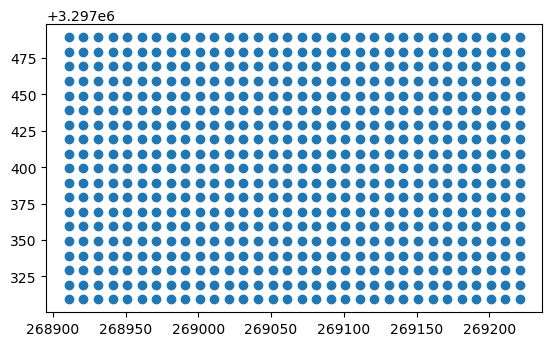

In [25]:
s.plot(aspect=1)